# Precision Agriculture

## Description
- Digital image processing is one of the potential technologies used in precision agriculture to gather information, such as seed emergence and plant health from digital images. Monitoring a plant farm requires a great deal of human, plant growth and tracking the health of the plant are two of the most important aspects in farm monitoring. Plant disease has a big impact on plant health, and it varies depending on a lot of things like climatic changes, ground soil, and insect disturbance. Identifying plant disease in today's agriculture is a difficult and complex process and traditionally done manually. Humans can identify external plant abnormalities by observing them, but personally inspecting each area of the field can be time consuming and challenging. With this, a farm monitoring system was introduced that can remotely observe the filed either by a Drone or field camera. The main focus of this system is to identify the dieses of the plant based on its plants characteristic and provide necessary to determine plants with disease. As show in the image below, (A) is a healthy plant while (B) is not.

## Task
- As part of detecting plant disease, an image needs to be pre-processed. With this, you task is to apply digital image processing technique to highlight the affected parts of the plant as shown in the image below.

## Explanation
1. Libraries Used:
    - cv2: OpenCV library for image processing tasks.
    - numpy: Library for numerical operations on arrays.
    - matplotlib.pyplot: Library for plotting and visualization.
2. User Defined Functions: N/A
3. Image Conversion:
    - Convert image from BGR to grayscale: The cv2.cvtColor() function is used to convert the input image from the default BGR (Blue-Green-Red) color space to grayscale. Grayscale images are often used for edge detection and thresholding.
4. Image Preparation:
    - Thresholding: The cv2.threshold() function is applied to convert the grayscale image into a binary image. A threshold value of 75 is used, where pixel values below the threshold are set to 0 (black) and values above the threshold are set to 255 (white). This operation helps to isolate the leaf from the background.
    - Edge Detection: The cv2.Canny() function is used to detect the edges in the binary image. The Canny edge detection algorithm identifies regions of significant intensity changes, which correspond to the edges of objects in the image.
    - Morphological Operation: The cv2.dilate() function is used to make the edges thicker by applying a morphological dilation operation. This helps to enhance the visibility of the leaf edges.
5. Explanation of Code:
    - The given image is read using cv2.imread() function.
    - The image is converted to grayscale using cv2.cvtColor() function.
    - Thresholding is applied using cv2.threshold() to create a binary image where green parts of the image become black and the rest becomes white.
    - Edge detection is performed using cv2.Canny() function to detect the edges in the binary image.
    - Morphological dilation is applied using cv2.dilate() to make the edges thicker for better visibility.
    - The original image and the segmented image are displayed side by side using plt.imshow() and plt.subplot() functions.
6. Additional Methods Used:
    - Additional Methods Used: N/A
7. Difficulty Faced and Solution:
    - Difficulty: The main difficulty faced in this challenge was determining an appropriate threshold value for thresholding the grayscale image. Choosing an incorrect threshold value could lead to incorrect segmentation or loss of important details.
    - Solution: To overcome this difficulty, an empirical approach was used. Multiple threshold values were tested on the grayscale image, and the value of 75 was found to provide a good segmentation result. Adjusting the threshold value based on the specific image characteristics and requirements can further refine the segmentation results.

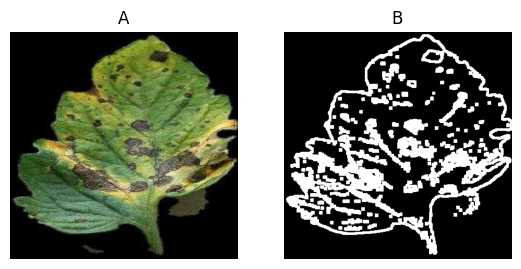

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
image = cv2.imread('Images/leaf.png')

gray = cv2.cvtColor(image ,cv2.COLOR_BGR2GRAY)

# make the green parts of the image black and the rest white
ret, thresh = cv2.threshold(gray, 75, 255, cv2.THRESH_BINARY)

# find the edges of the image
edges = cv2.Canny(thresh, 50, 200)

# Make the edges thicker
kernel = np.ones((3,3),np.uint8)
edges = cv2.dilate(edges,kernel,iterations = 2)

# Display the original image and the segmented image
plt.figure(figsize=(10, 10))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('A')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(edges, cmap='gray')
plt.title('B')
plt.axis('off')
plt.show()